#**SVM** & Naive Bayes

In [31]:
#21.Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the SVM Classifier
svm_classifier = SVC(kernel='linear')

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [32]:
#22.Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

wine = datasets.load_wine()
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')
svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"Linear Kernel Accuracy: {accuracy_linear:.2f}")
print(f"RBF Kernel Accuracy: {accuracy_rbf:.2f}")

Linear Kernel Accuracy: 0.98
RBF Kernel Accuracy: 0.76


In [33]:
#23.Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE).

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Load the California housing dataset
california = fetch_california_housing()
X = california.data
y = california.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the SVM Regressor
svr = SVR(kernel='rbf')

# Train the regressor
svr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr.predict(X_test)

# Evaluate the performance using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 1.35


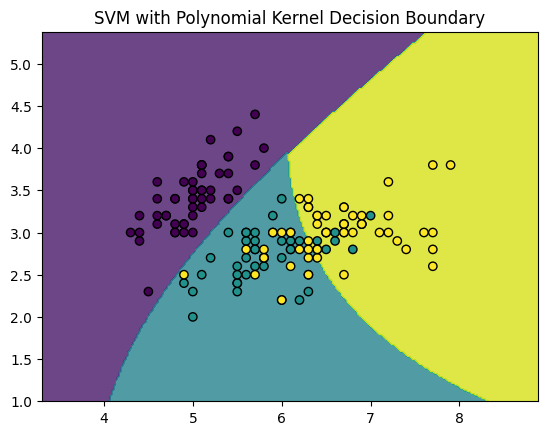

In [7]:
#24.Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary.

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

svm_poly = SVC(kernel='poly', degree=3)

svm_poly.fit(X, y)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.title('SVM with Polynomial Kernel Decision Boundary')
plt.show()

In [8]:
#25.Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
gnb = GaussianNB()

gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.94


In [9]:
#26.Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset.

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
newsgroups = fetch_20newsgroups(subset='all')
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.3, random_state=42)
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.84


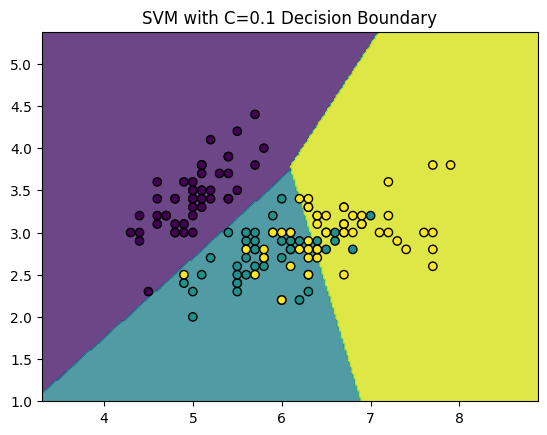

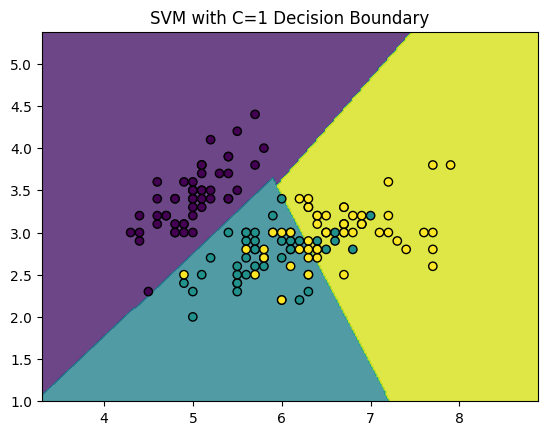

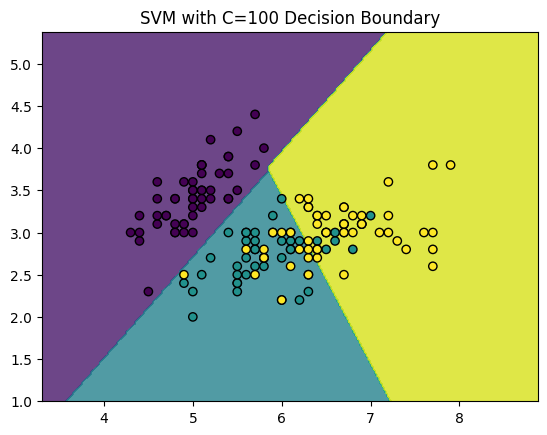

In [10]:
#27.Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually.

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
C_values = [0.1, 1, 100]

for C in C_values:
    svm = SVC(kernel='linear', C=C)
    svm.fit(X, y)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(f'SVM with C={C} Decision Boundary')
    plt.show()

In [11]:
#28.Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features.

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.73


In [12]:
#29.Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm_unscaled = SVC(kernel='linear')
svm_unscaled.fit(X_train, y_train)
y_pred_unscaled = svm_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)
svm_scaled = SVC(kernel='linear')
svm_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = svm_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"Accuracy on Unscaled Data: {accuracy_unscaled:.2f}")
print(f"Accuracy on Scaled Data: {accuracy_scaled:.2f}")

Accuracy on Unscaled Data: 1.00
Accuracy on Scaled Data: 0.98


In [13]:
#30.Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
gnb_no_smoothing = GaussianNB(var_smoothing=0)
gnb_no_smoothing.fit(X_train, y_train)
y_pred_no_smoothing = gnb_no_smoothing.predict(X_test)
accuracy_no_smoothing = accuracy_score(y_test, y_pred_no_smoothing)
gnb_smoothing = GaussianNB()
gnb_smoothing.fit(X_train, y_train)
y_pred_smoothing = gnb_smoothing.predict(X_test)
accuracy_smoothing = accuracy_score(y_test, y_pred_smoothing)

print(f"Accuracy without Laplace Smoothing: {accuracy_no_smoothing:.2f}")
print(f"Accuracy with Laplace Smoothing: {accuracy_smoothing:.2f}")

Accuracy without Laplace Smoothing: 0.98
Accuracy with Laplace Smoothing: 0.98


In [14]:
#32.Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel).

from sklearn import datasets
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, refit=True, verbose=2)
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.2f}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, 

In [15]:
#32.Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check if it improves accuracy.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, weights=[0.99], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
svm_no_weight = SVC(kernel='linear')
svm_no_weight.fit(X_train, y_train)
y_pred_no_weight = svm_no_weight.predict(X_test)

# Evaluate the accuracy
accuracy_no_weight = accuracy_score(y_test, y_pred_no_weight)
svm_weight = SVC(kernel='linear', class_weight='balanced')
svm_weight.fit(X_train, y_train)
y_pred_weight = svm_weight.predict(X_test)
accuracy_weight = accuracy_score(y_test, y_pred_weight)

print(f"Accuracy without class weighting: {accuracy_no_weight:.2f}")
print(f"Accuracy with class weighting: {accuracy_weight:.2f}")

Accuracy without class weighting: 0.99
Accuracy with class weighting: 0.77


In [16]:
#33.Write a Python program to implement a Naive Bayes classifier for spam detection using email data.

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', categories=['alt.atheism', 'soc.religion.christian'])

X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.3, random_state=42)

# Create a pipeline with CountVectorizer and MultinomialNB
model = make_pipeline(CountVectorizer(), MultinomialNB())

# Train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98


In [17]:
#34. Write a Python program to train an SVM Classifier and a Naive Bayes Classifier on the same dataset and compare their accuracy.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print(f"SVM Accuracy: {accuracy_svm:.2f}")
print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")

SVM Accuracy: 1.00
Naive Bayes Accuracy: 0.98


In [18]:
#35. Write a Python program to perform feature selection before training a Naive Bayes classifier and compare results.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
selector = SelectKBest(chi2, k=2)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
nb = GaussianNB()
nb.fit(X_train_selected, y_train)
y_pred = nb.predict(X_test_selected)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with feature selection: {accuracy:.2f}")

Accuracy with feature selection: 1.00


In [19]:
#36.Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score

# Load the Wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
svm_ovr = OneVsRestClassifier(SVC(kernel='linear'))
svm_ovr.fit(X_train, y_train)
y_pred_ovr = svm_ovr.predict(X_test)

# Evaluate the accuracy
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)
svm_ovo = OneVsOneClassifier(SVC(kernel='linear'))
svm_ovo.fit(X_train, y_train)
y_pred_ovo = svm_ovo.predict(X_test)

# Evaluate the accuracy
accuracy_ovo = accuracy_score(y_test, y_pred_ovo)

print(f"One-vs-Rest Accuracy: {accuracy_ovr:.2f}")
print(f"One-vs-One Accuracy: {accuracy_ovo:.2f}")

One-vs-Rest Accuracy: 0.98
One-vs-One Accuracy: 0.98


In [20]:
#37.Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
svm_linear = SVC(kernel='linear')
svm_poly = SVC(kernel='poly', degree=3)
svm_rbf = SVC(kernel='rbf')
svm_linear.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"Linear Kernel Accuracy: {accuracy_linear:.2f}")
print(f"Polynomial Kernel Accuracy: {accuracy_poly:.2f}")
print(f"RBF Kernel Accuracy: {accuracy_rbf:.2f}")

Linear Kernel Accuracy: 0.96
Polynomial Kernel Accuracy: 0.94
RBF Kernel Accuracy: 0.94


In [21]:
#38. Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy.

from sklearn import datasets
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC

iris = datasets.load_iris()
X = iris.data
y = iris.target

svm = SVC(kernel='linear')
skf = StratifiedKFold(n_splits=5)
scores = cross_val_score(svm, X, y, cv=skf)
average_accuracy = scores.mean()
print(f"Average Accuracy: {average_accuracy:.2f}")

Average Accuracy: 0.98


In [22]:
#39.Write a Python program to train a Naive Bayes classifier using different prior probabilities and compare performance.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

nb_prior1 = GaussianNB(priors=[0.2, 0.3, 0.5])
nb_prior1.fit(X_train, y_train)
y_pred_prior1 = nb_prior1.predict(X_test)
accuracy_prior1 = accuracy_score(y_test, y_pred_prior1)

nb_prior2 = GaussianNB(priors=[0.5, 0.3, 0.2])
nb_prior2.fit(X_train, y_train)
y_pred_prior2 = nb_prior2.predict(X_test)
accuracy_prior2 = accuracy_score(y_test, y_pred_prior2)

print(f"Accuracy with priors [0.2, 0.3, 0.5]: {accuracy_prior1:.2f}")
print(f"Accuracy with priors [0.5, 0.3, 0.2]: {accuracy_prior2:.2f}")

Accuracy with priors [0.2, 0.3, 0.5]: 0.96
Accuracy with priors [0.5, 0.3, 0.2]: 1.00


In [23]:
#40.Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy.
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm = SVC(kernel='linear')
rfe = RFE(svm, n_features_to_select=2)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

svm.fit(X_train_rfe, y_train)
y_pred = svm.predict(X_test_rfe)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with RFE: {accuracy:.2f}")

Accuracy with RFE: 1.00


In [24]:
#41. Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Precision: 1.00
Recall: 1.00
F1-Score: 1.00


In [25]:
#42.Write a Python program to train a Naive Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss).

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_proba = nb.predict_proba(X_test)

log_loss_value = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {log_loss_value:.2f}")

Log Loss: 0.05


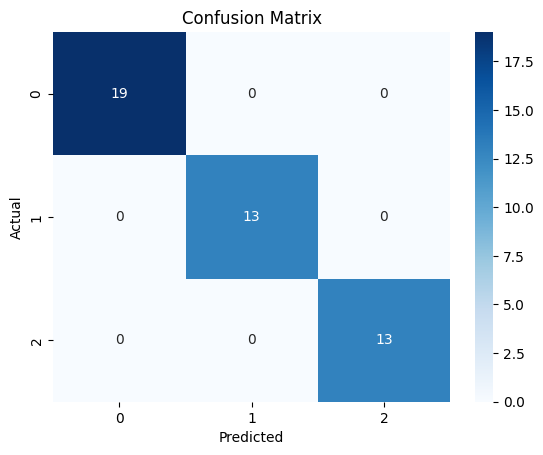

In [26]:
#43.Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn.

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [29]:
#44.Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE.
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Load the California housing dataset
california = fetch_california_housing()
X = california.data
y = california.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

# Evaluate the performance using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

Mean Absolute Error: 0.87


In [34]:
#45.Write a Python program to train a Naive Bayes classifier and evaluate its performance using the ROC-AUC score.
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score

cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_proba = nb.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.2f}")

ROC-AUC Score: 0.99


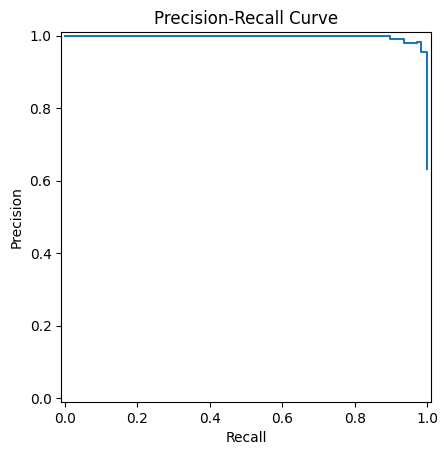

In [35]:
#46.Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)

y_scores = svm.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_scores)

disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title('Precision-Recall Curve')
plt.show()